# <center>TP final PAPY: construire un projet complet</center>
<center> Zhenyu PU </center>

<center>26 Octobre 2023 </center>

## Objectif du programme

1. Déterminer si un point du plan complexe appartient à l'ensemble de Mandelbrot.
Si un couple $(z_0,c)$ appartient à l'ensemble de Julia pour le $c$ choisi.

1. Sauvegarder une représentation graphique (image au format PNG) de l'ensemble choisit.

1. Appel en ligne de commande pour générer l'image voulue

1. Générer de la documentation Python

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image, ImageDraw

Tout d’abord, on crée un **itérateur** et utilisons la fonction rendement pour itérer afin de générer l’ensemble de Mandelbrot et l’ensemble de Julia. Le nombre maximum d'itérations est déterminé par le paramètre **max_iter**.

In [2]:
# constants:
candidat = 0.5
parametre = 0.5

def suite(z,c, max_iter)-> complex:
    """Générateur des éléments de la suite $z_{n+1}=z_n^2+c$
    
    c.f. Chapitre 2"""
    for _ in range(max_iter):
        yield z
        z = z ** 2 + c

def suite_mandelbrot(max_iter, z=0,c = candidat)-> complex:
    """Renvoie la suite de Mandelbrot"""
    return suite(z,c, max_iter)

def suite_julia(max_iter, z=candidat,c=parametre)-> complex:
    """Renvoie la suite de julia pour candidat et parametre"""
    if z == 0:
        raise ValueError("z ne peut pas être 0")
    return suite(z,c, max_iter)

In [3]:
# c est complex, max_iter est nombre de iteration
# r est rayon de convergence
def is_in_Mandelbrot(c, max_iter = 50):
    r = 2
    list = suite_mandelbrot(z = 0, c = c, max_iter = max_iter)
    for item in list:
        if abs(item) > r:
            return False
    return True

In [4]:
# c est complex, max_iter est nombre de iteration
# r est rayon de convergence
def is_in_Julia(z, c, max_iter = 50):
    r = 2
    list = suite_julia(z = z, c = c, max_iter = max_iter)
    for item in list:
        if abs(item) > r:
            return False
    return True

Nous utilisons plusieurs exemples pour **tester la fonction écrite** précédemment afin de déterminer si la fonction est utile.

In [5]:
is_in_Mandelbrot(c = 0.251)

True

In [6]:
is_in_Mandelbrot(c = 0.251, max_iter = 100)

False

In [7]:
is_in_Julia(z = 0.25 + 0.25j, c = 0.25)

True

Voici les fonctions permettant de dessiner respectivement des images d'ensembles de points de Mandelbrot et de Julia.

J'ai d'abord créé une fonction qui utilise le module **matplot.pyplot** pour **stocker simultanément les coordonnées** des points de l'ensemble dans une liste, puis dessiner l'image. Cette méthode est réalisable mais l'efficacité est trop faible et le temps d'exécution est **trop long**. 

J'utilise donc **la matrice pix** à la place, j'utilise le module **PIL.Image** pour **stocker les points qui satisfont l'ensemble** dans la matrice pix et je définis la valeur du **pixel à (0, 0, 0)**, c'est-à-dire Noir, définissez l'arrière-plan sur blanc pour un dessin plus rapide.

> **ATTENTION**: Le graphique généré par le code suivant se trouve dans le dossier img, à l'exception de ceux de CLI.

Vous trouverez ci-dessous le diagramme d'ensemble de points de Mandelbrot

In [8]:
""" La méthode plus longue """
def plot_mandelbrot_old(zmin = -2-2j, zmax = 2+2j, 
                    pixel_size = 0.0005, max_iter = 50, 
                    figname = 'img/Mandelbrot.png'):
    n_real = int(1 / pixel_size)   # Nombre de points régulièrement espacés sur la pièce réelle
    n_imag = int(1 / pixel_size)  # Nombre de points régulièrement espacés sur la partie imaginaire

    # Créer des valeurs équidistantes sur les parties réelles et imaginaires
    real_values = np.linspace(zmin.real, zmax.real, n_real)
    imag_values = np.linspace(zmin.imag, zmax.imag, n_imag)
    plt.figure(figsize=(15, 15))
    res_x = []
    res_y = []
    for x in real_values:
        for y in imag_values:
            c = complex(x, y)
            if is_in_Mandelbrot(c, max_iter = max_iter):
                # Enregistrer les points dans la liste
                res_x.append(x)
                res_y.append(y)
    plt.plot(res_x, res_y, 'o', color = 'k')
    plt.savefig(figname)
    plt.show()

In [9]:
""" La méthode plus rapide """
def plot_mandelbrot(zmin = -2-2j, zmax = 2+2j, 
                    pixel_size = 0.0005, max_iter = 50, 
                    figname = 'img/Mandelbrot.png'):
    w = int(1 / pixel_size)  # Nombre de points régulièrement espacés sur la pièce réelle
    h = int(1 / pixel_size)  # Nombre de points régulièrement espacés sur la partie imaginaire
    # définir l'arrière-plan
    bitmap = Image.new("RGB", (w, h), "white")
    pix = bitmap.load()
    
    # Créer des valeurs équidistantes sur les parties réelles et imaginaires
    real_values = np.linspace(zmin.real, zmax.real, w)
    imag_values = np.linspace(zmin.imag, zmax.imag, h)

    for x in range(w):
        for y in range(h):
            real_value = real_values[x]
            imag_value = imag_values[y]
            c = complex(real_value, imag_value)
            if is_in_Mandelbrot(c, max_iter = max_iter):
                # matrice de pixels
                pix[x, y] = (0, 0, 0)
    bitmap.save(figname)
    bitmap.show()

Vous trouverez ci-dessous le diagramme d'ensemble de points Julia

In [ ]:
""" La méthode plus longue """
def plot_julia_old(c=-0.8+0.156j,zmin=-2-2j,zmax=2+2j,
                    pixel_size=0.0005,max_iter=50,
                    figname="img/julia.png"):
    fig = plt.figure(figsize=(15, 15))

    real_values = np.arange(zmin.real,zmax.real,pixel_size)
    imag_values = np.arange(zmin.imag,zmax.imag,pixel_size)
    res_x = []
    res_y = []
    for x in real_values:
        for y in imag_values:
            if is_in_Julia(z=complex(x,y),c=c,max_iter=max_iter):
                res_x.append(x)
                res_y.append(y)
    plt.plot(res_x,res_y,',',color='black',ms=3)
    fig.savefig(figname)
    plt.show()

In [10]:
""" La méthode plus rapide """
def plot_julia(c, zmin = -1, zmax = 1, 
               pixel_size = 0.0005, max_iter = 50, 
               figname = "img/Julia.png"):
    
    w = int(1 / pixel_size) 
    h = int(1 / pixel_size) 
    bitmap = Image.new("RGB", (w, h), (255, 255, 255))
    draw = ImageDraw.Draw(bitmap)

    real_values = np.linspace(zmin.real, zmax.real, w)
    imag_values = np.linspace(zmin.imag, zmax.imag, h)
    
    for x in range(w):
        for y in range(h):
            real_value = real_values[x]
            imag_value = imag_values[y]
            z = complex(real_value, imag_value)
            if is_in_Julia(z = z, c = c, max_iter = max_iter):
                draw.point((x, y), fill = (0, 0, 0))
    bitmap.save(figname)
    bitmap.show()

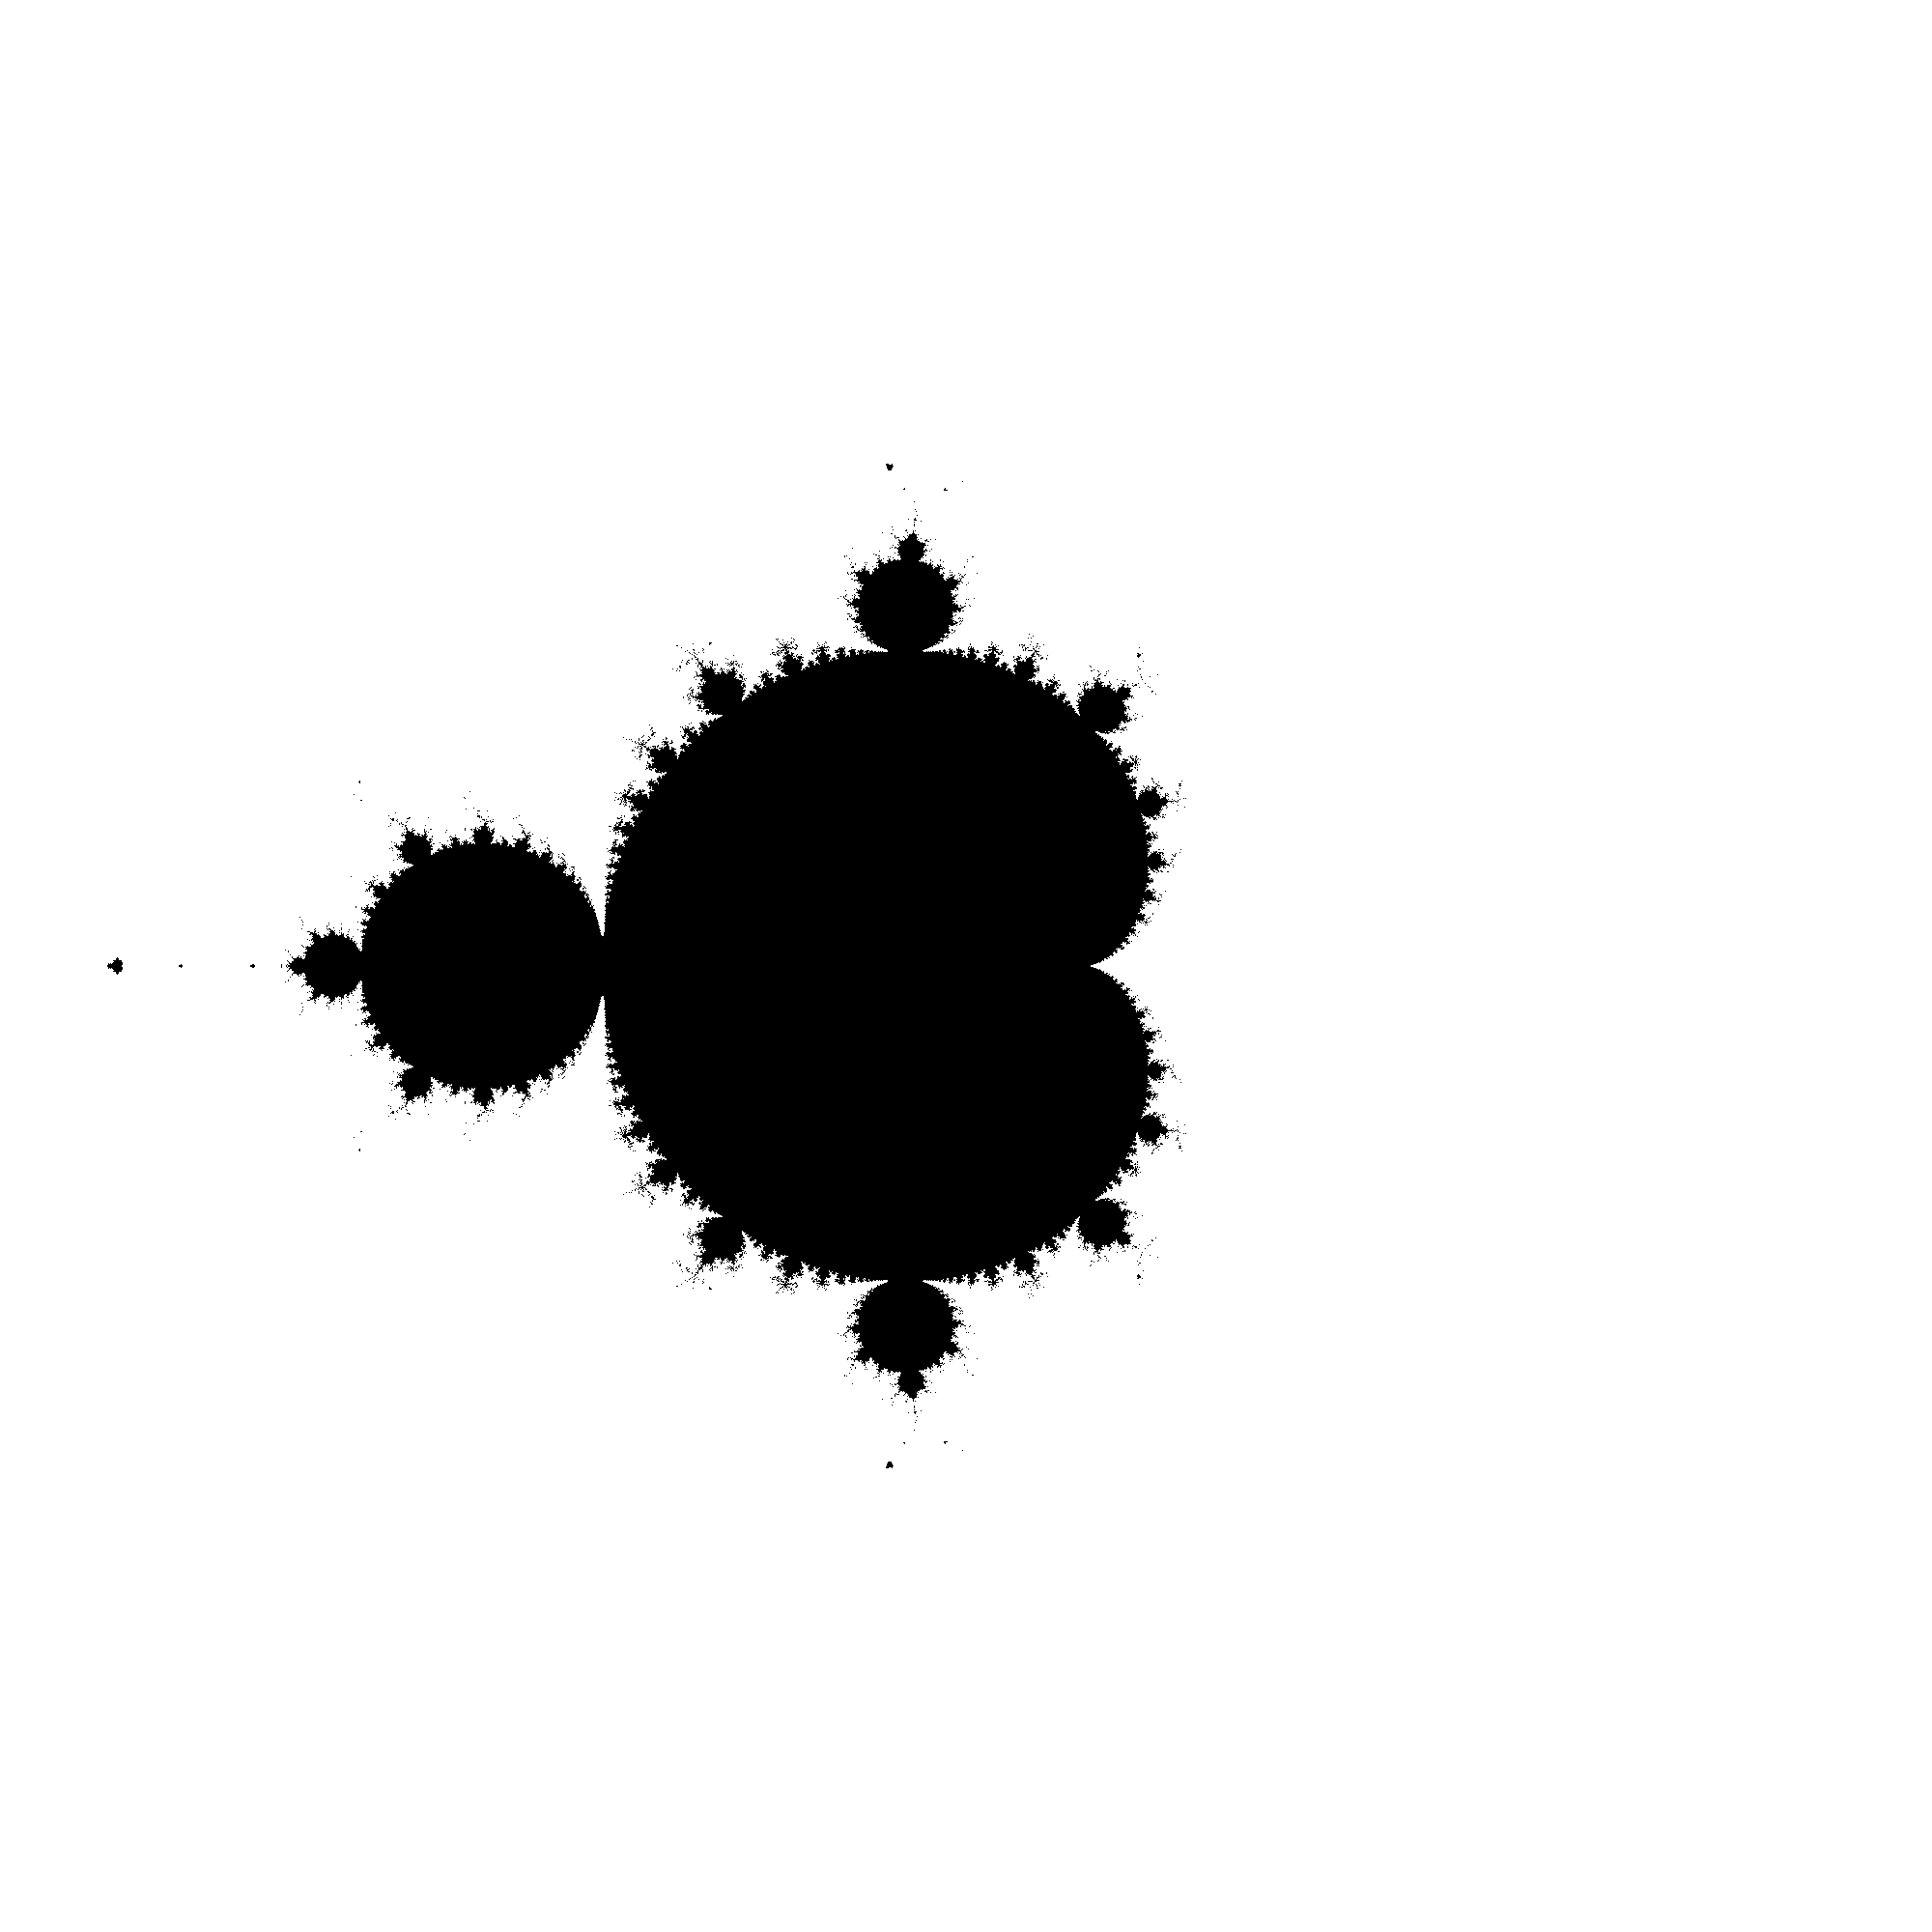

In [11]:
plot_mandelbrot()

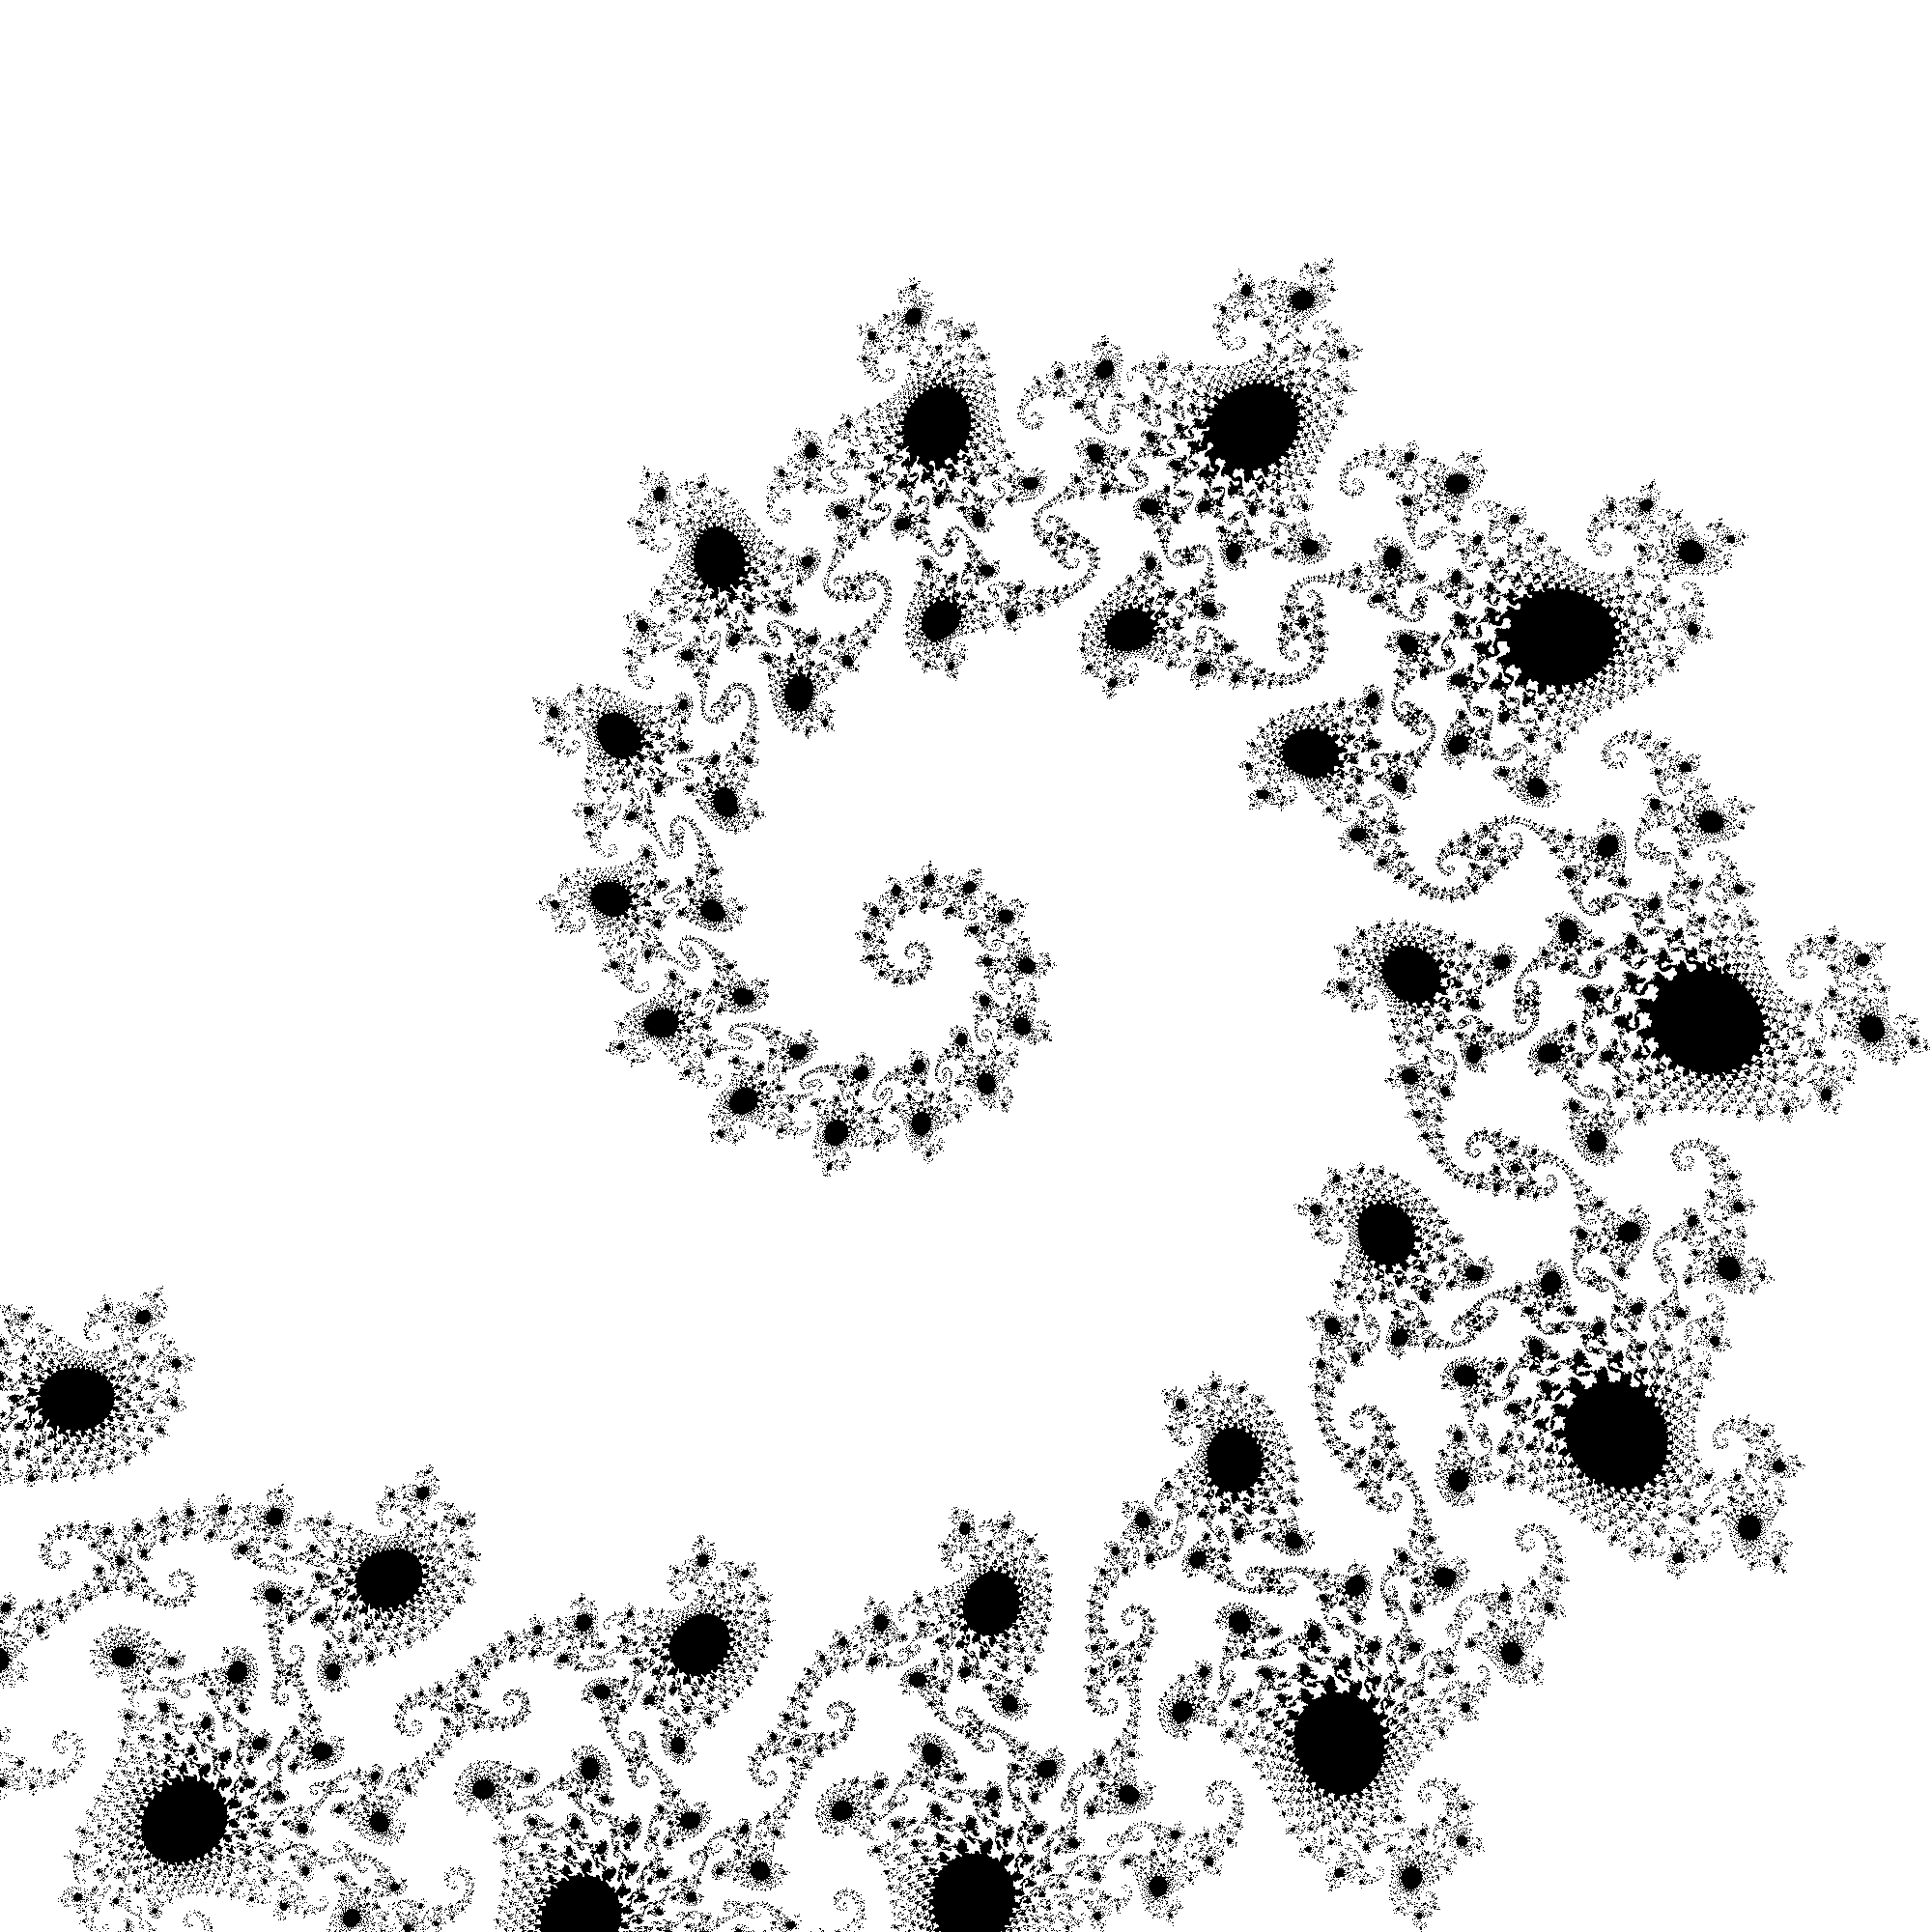

In [12]:
plot_mandelbrot(zmin=-0.7440+0.1305j,
                    zmax=-0.7425+0.1320j,
                    pixel_size=5e-4,
                    max_iter=200,figname="img/Mandelbrot_tentacle.png")

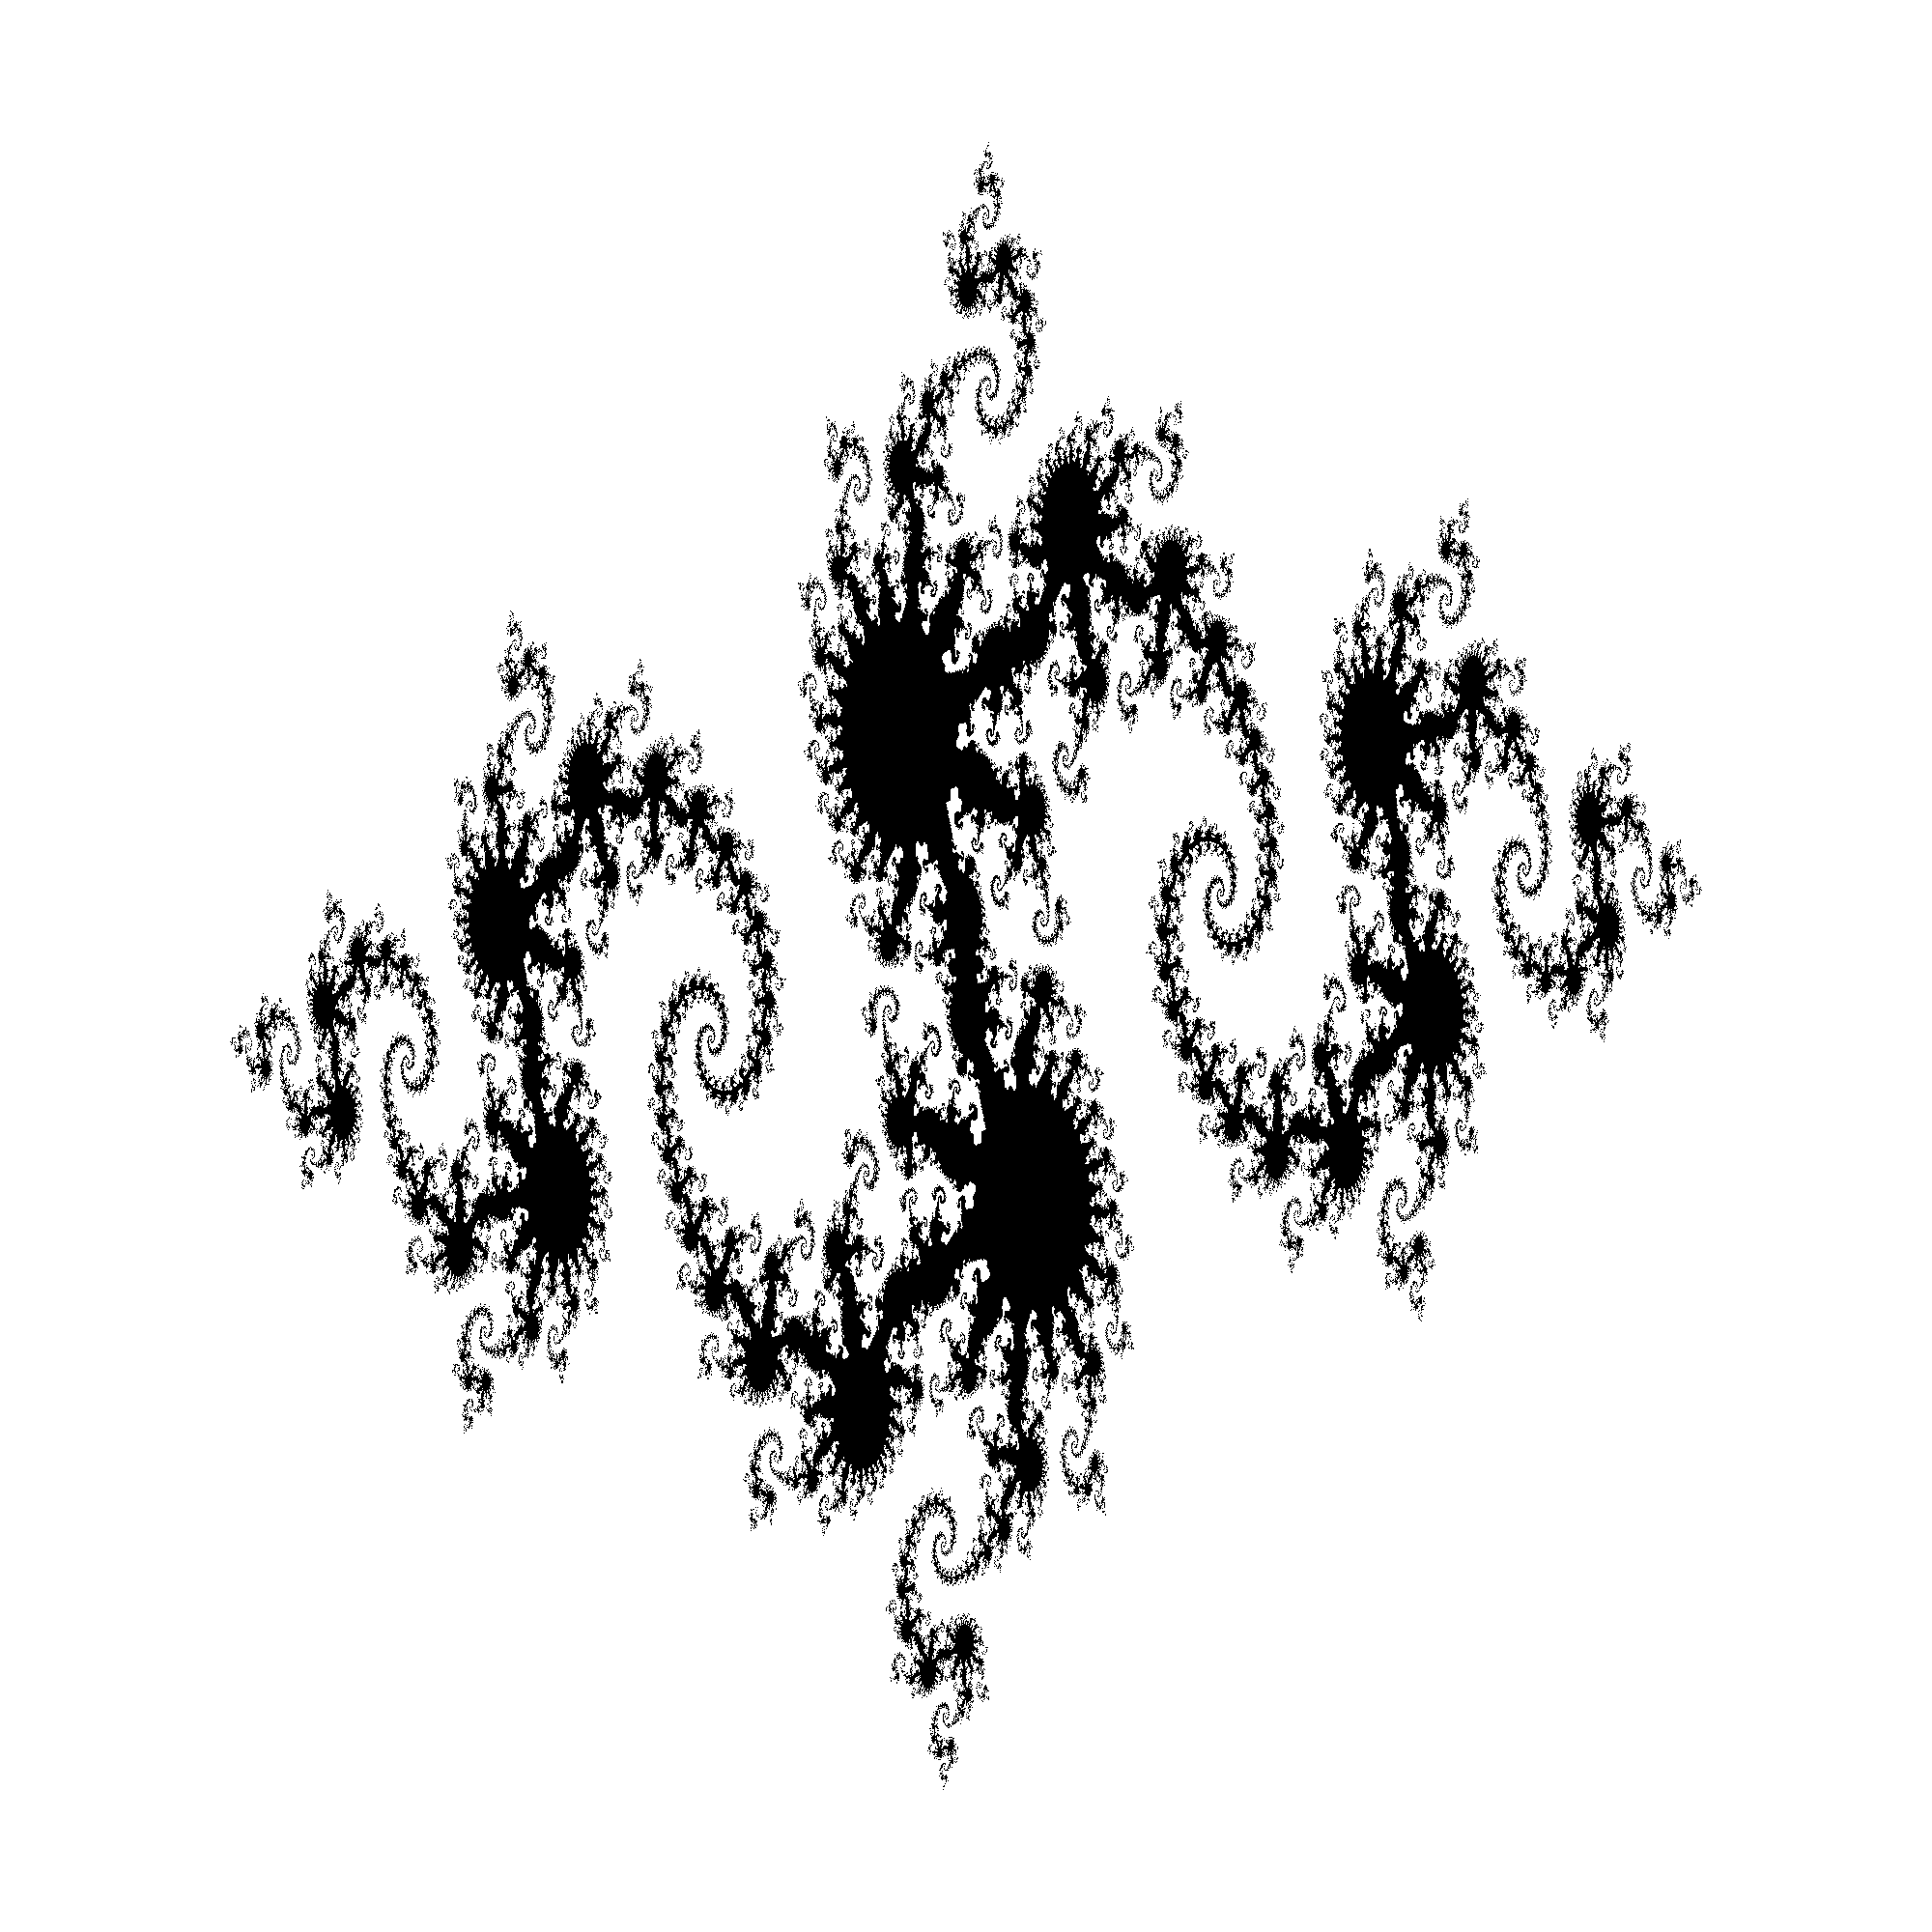

In [13]:
plot_julia(c=-0.8 + 0.156j,
                zmin=-2-1j,
                zmax=2+1j,
                pixel_size=5e-4,
                max_iter=100,
                figname="img/Julia_-0.8+0.156j.png")

J'ai créé la bibliothèque Mandelbrot_Julia_Plot, qui est capable de tracer des ensembles de Mandelbrot et de Julia. Vous pouvez l'utiliser via la commande terminal comme suit :

Si vous souhaitez utiliser ce module, vous pouvez saisir la commande suivante :

```bash
$ python -m Mandelbrot_Julia_Plot MandelbrotPlot -o mandelbrot.png
```

Si vous ne souhaitez pas saisir `python -m Mandelbrot_Julia_Plot` à chaque fois, vous pouvez utiliser cette commande :

```bash
$ source load_aliases.sh
```


Ensuite, vous pouvez facilement utiliser `MandelbrotPlot` et `MandelbrotPlot` comme alias.

Et mon document généré automatiquement est terminé. Vous pouvez accéder au chemin `PAPY/TP_Final/doc/build/html` pour le visualiser. Il contient des instructions pour utiliser les fonctions de la bibliothèque et diverses fonctions de la bibliothèque.

Produire une par défaut de l'un des deux ensembles.
```bash
$ MandelbrotPlot -o mandelbrot.png
$ JuliaPlot -o julia.png
```

Produire une visu avec les détails choisis, comme dans l'API.
```bash
$ MandelbrotPlot --zmin=-0.7440+0.1305j\
                --zmax=-0.7425+0.1320j \
                --pixel_size=5e-7\
                --max-iter=50\
                -o "Mandelbrot_tentacle_lowiter.png" 
```
![](Mandelbrot_tentacle_lowiter.png)

Générez une image d'ensemble Julia par défaut :

```bash
$ JuliaPlot -c=-0.8j\
            --pixel_size=1e-3\
            --max-iter=50\
            -o "thunder-julia.png" 
```
![](thunder-julia.png)